## Smallest nonzero persistent eigenvalue of a filtration

In [1]:
import tadasets
from persistent_laplacians.eigenvalues import compute_eigenvalues
torus = tadasets.torus(n=100, c=3, a=1, seed=42)

In [2]:
result, indices = compute_eigenvalues(torus, num_indices=10, use_scipy=True, use_stepwise_schur=False, zero_tol=1e-6)

1182
defaultdict(<class 'list'>, {0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 1: [0.0010894419374655006, 0.009116738587985763, 0.010415762590807015, 0.011926383874925041, 0.01599498234423436, 0.016724837085369735, 0.017361620310794194, 0.019510602643318355, 0.02142349972067019, 0.023001053106858852, 0.028943909309761838, 0.029723195041980482, 0.03219042451356686, 0.03395310437120923, 0.03404263812502861, 0.039743990129047585, 0.04259892152865606, 0.04276693227330181, 0.044610321068063924, 0.05022063060040379, 0.05428654857382664, 0.0

/home/marmas/personal/repos/persistent-laplacians/python/persistent_laplacians/eigenvalues.py:13: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  pl.smallest_eigenvalue(


## Plot nonpersistent eigenvalues

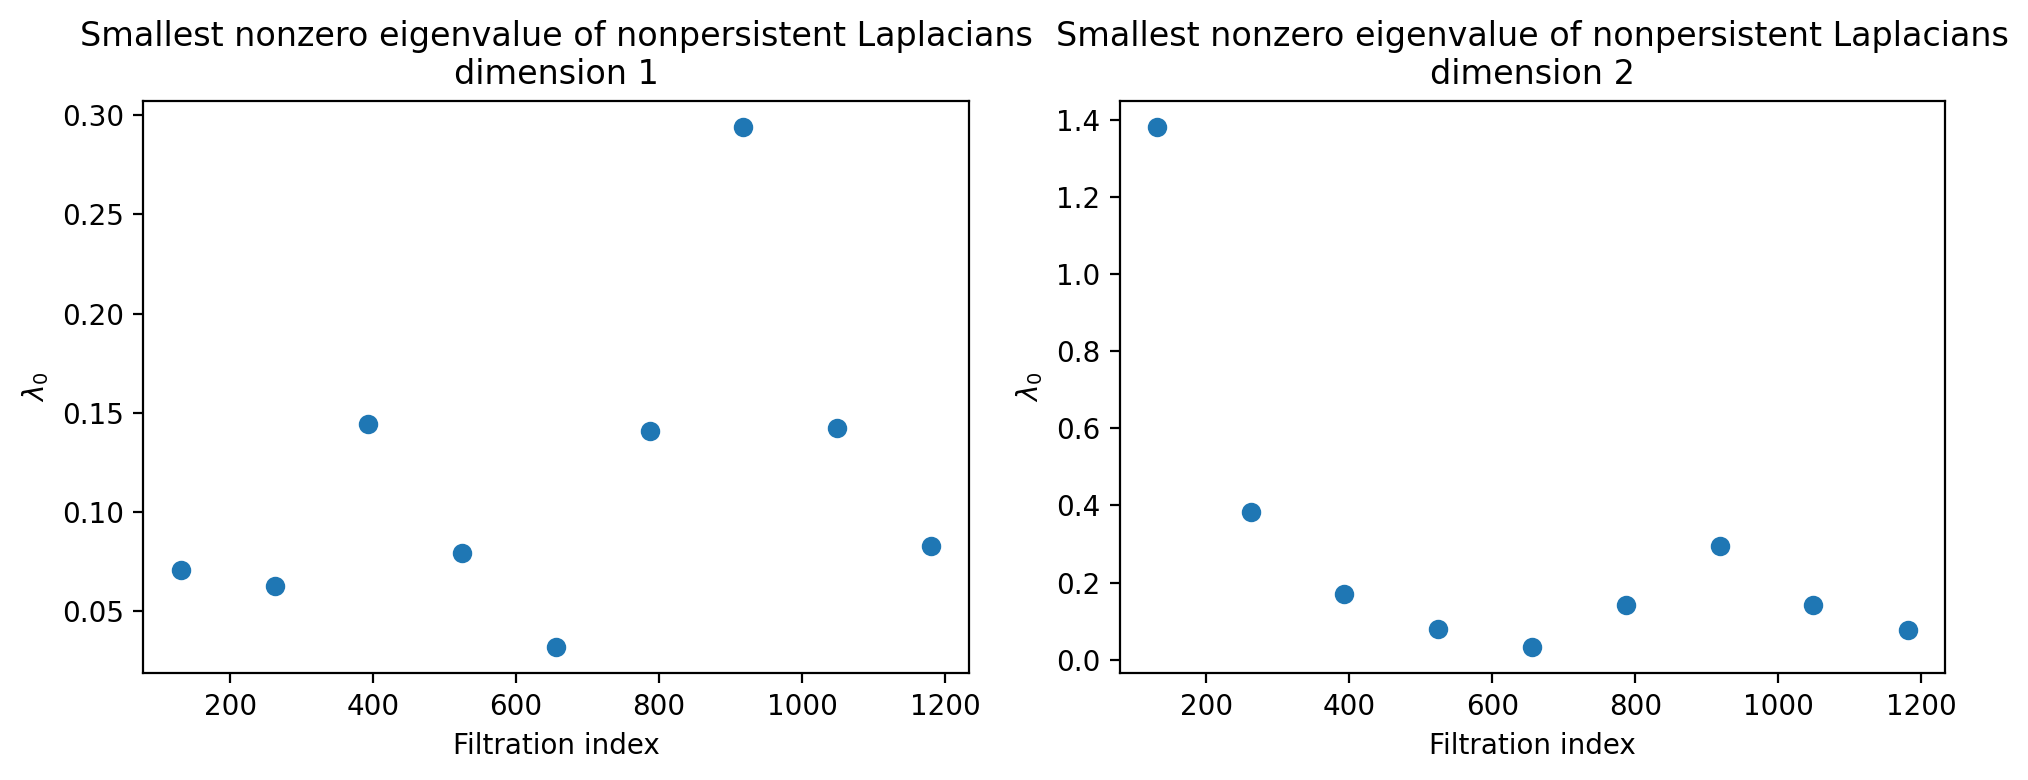

In [5]:
import matplotlib.pyplot as plt

dims = [1, 2]
fig, axes = plt.subplots(1, len(dims), figsize=(5*len(dims), 4), dpi=200)

if len(dims) == 1:
    axes = [axes]

for ax, d in zip(axes, dims):
    nonpersistent = {k[0]: v[0] for (k, v) in result[d].items() if k[0] == k[1] and len(v) >= 1}
    ax.scatter(nonpersistent.keys(), nonpersistent.values())
    ax.set_title(r"Smallest nonzero eigenvalue of nonpersistent Laplacians"
                 + "\n" + f"dimension {d}")
    ax.set_xlabel("Filtration index")
    ax.set_ylabel(r"$\lambda_0$")

plt.tight_layout()
plt.show()


## Persistent smallest nonzero eigenvalues

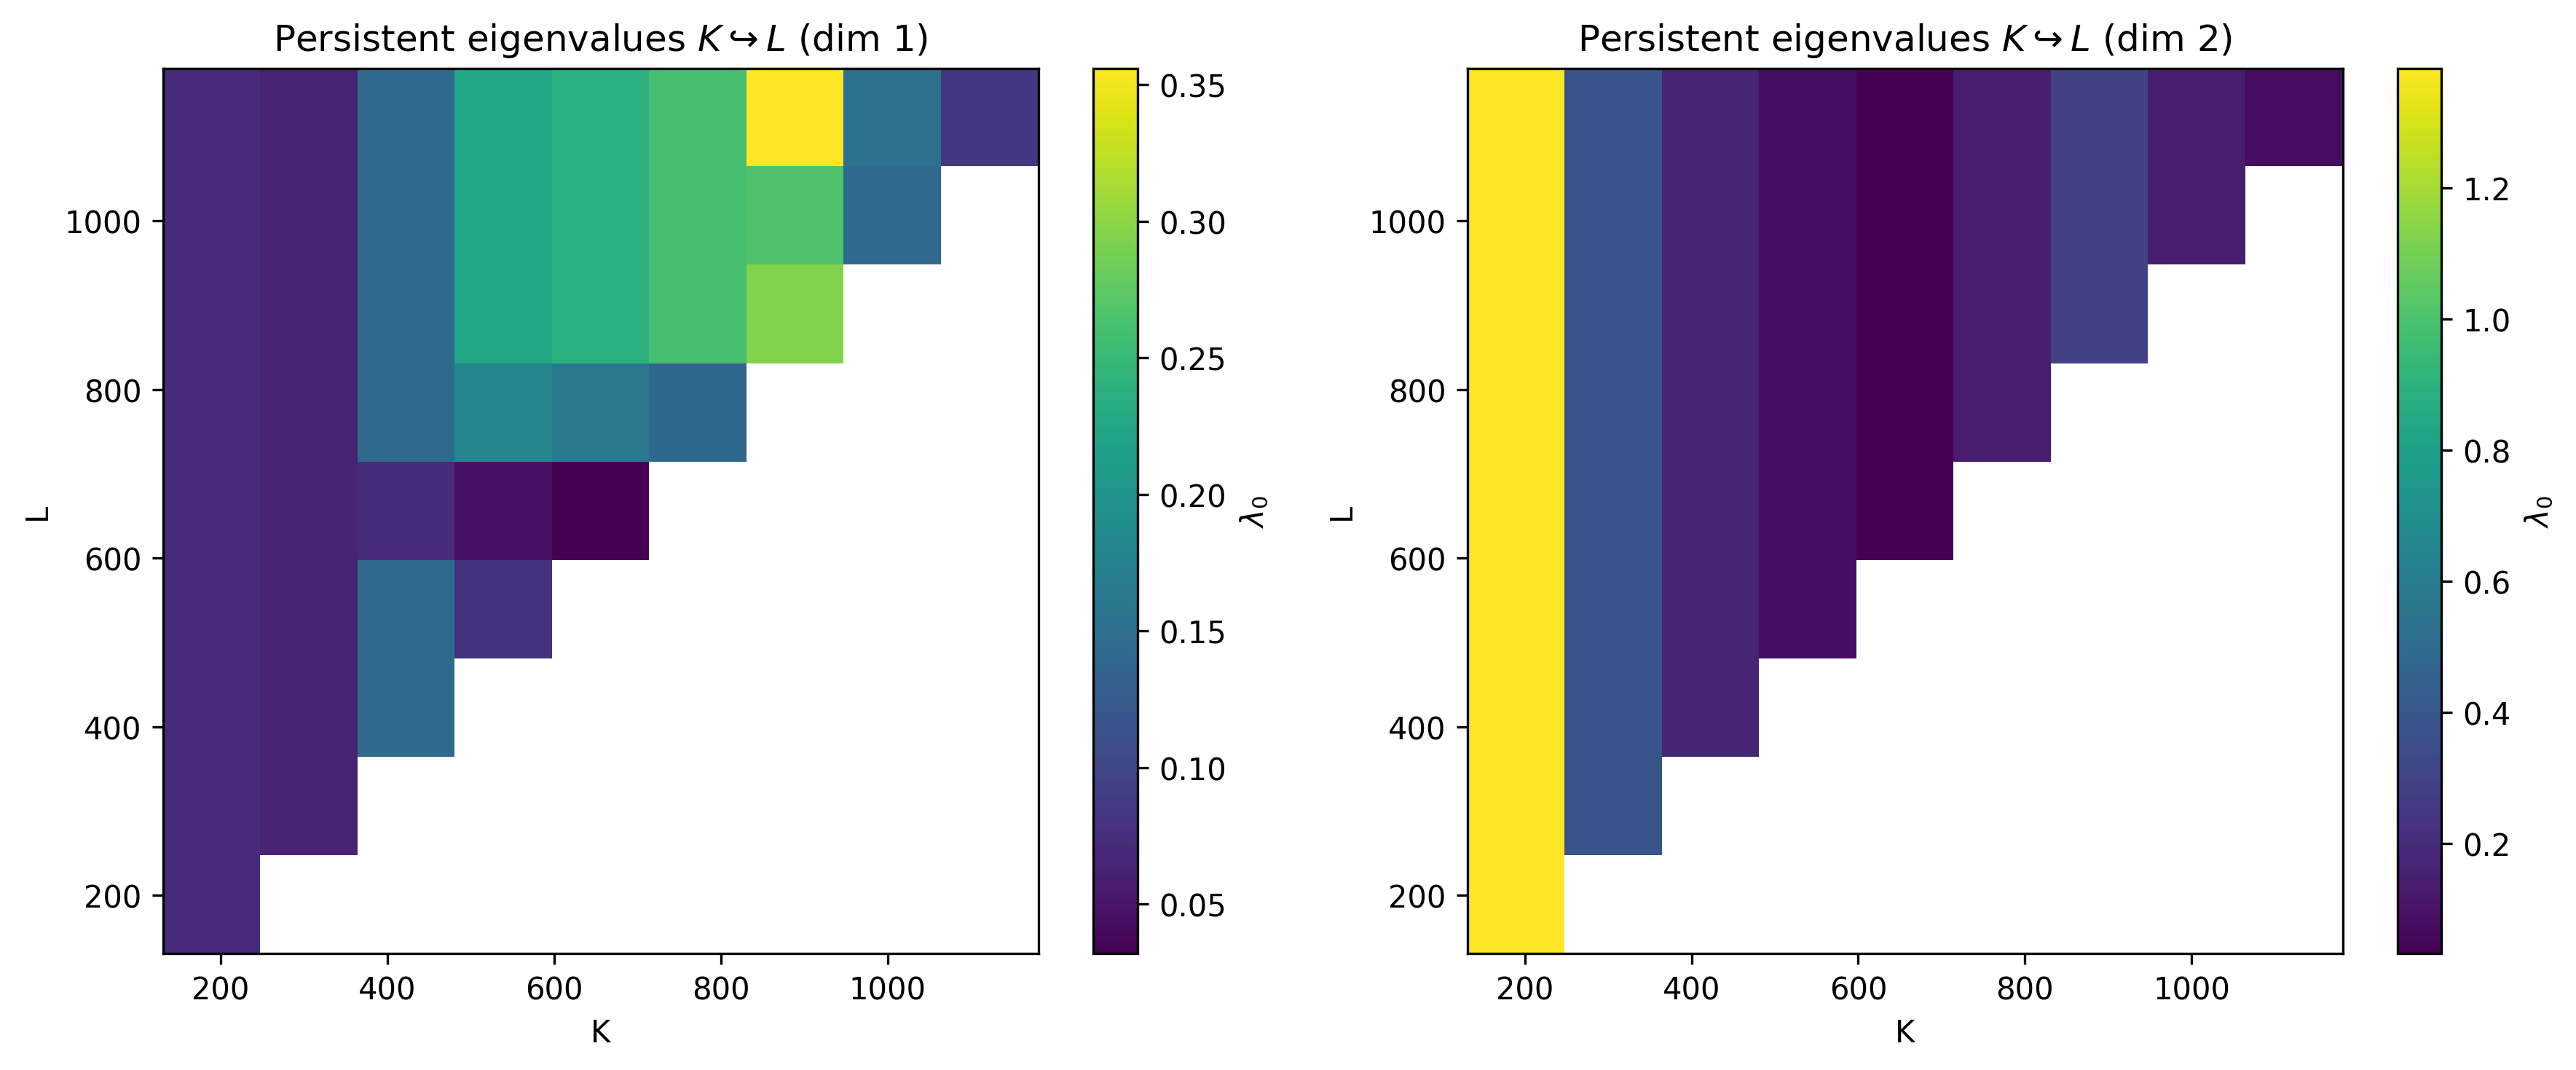

In [7]:
import numpy as np
import matplotlib.pyplot as plt

dims = [1, 2]  # change to the dimensions you want
fig, axes = plt.subplots(1, len(dims), figsize=(6*len(dims), 5), dpi=300)

if len(dims) == 1:
    axes = [axes]

for ax, d in zip(axes, dims):
    pts = {k: v for (k, v) in result[d].items() if len(v) >= 1}

    xs = sorted({x for x, y in pts})
    ys = sorted({y for x, y in pts})

    heat = np.full((len(ys), len(xs)), np.nan)
    x_i = {x:i for i,x in enumerate(xs)}
    y_i = {y:i for i,y in enumerate(ys)}

    for (x,y), v in pts.items():
        heat[y_i[y], x_i[x]] = v[0]

    im = ax.imshow(
        heat,
        origin='lower',
        extent=(min(xs), max(xs), min(ys), max(ys)),
        aspect='auto'
    )
    fig.colorbar(im, ax=ax, label=r'$\lambda_0$')
    ax.set_xlabel("K")
    ax.set_ylabel("L")
    ax.set_title(rf'Persistent eigenvalues $K \hookrightarrow L$ (dim {d})')

plt.tight_layout()
plt.show()
